# CLUSTERING

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# we are using the scipy implementation
%matplotlib inline
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [49]:
df = pd.read_csv('data/users_extension.csv')
df = df[['frequency', 'favorite_avg', 'retweet_perc', 'delta_friends', 'quote_perc', 'retweet_avg', 'tweet_len_avg', 'url_perc']]

## K-Means

In [88]:
## normalize vectors
from sklearn.preprocessing import normalize

matrix = df.as_matrix()
matrix = normalize(matrix)
matrix[:,2] = matrix[:,2] * 1.5
matrix[:,7] = matrix[:,7] * 2

df_n = pd.DataFrame(data=matrix, index=df.index)

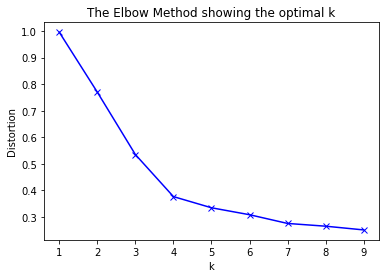

In [89]:
# k means determine k
distortions = []    
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_n)
    distortions.append(sum(np.min(cdist(df_n, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [78]:
kmeanModel = KMeans(n_clusters=6)
clusters = kmeanModel.fit_predict(df_n)

In [79]:
cl1 = np.argwhere(clusters==0).squeeze()
cl2 = np.argwhere(clusters==1).squeeze()
cl3 = np.argwhere(clusters==2).squeeze()
cl4 = np.argwhere(clusters==3).squeeze()
cl5 = np.argwhere(clusters==4).squeeze()
cl6 = np.argwhere(clusters==5).squeeze()

In [80]:
cl1_df = df.iloc[cl1]
cl2_df = df.iloc[cl2]
cl3_df = df.iloc[cl3]
cl4_df = df.iloc[cl4]
cl5_df = df.iloc[cl5]
cl6_df = df.iloc[cl6]

In [81]:
len(cl6)

67

In [82]:
cl1_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
27,12.500000,0.0,0,-1,0,0.000000,16.800000,0
59,20.000000,0.0,0,4,0,0.000000,55.940000,0
79,49.500000,0.0,100,-20,5,101.343434,106.575758,41
104,98.000000,0.0,100,-4,39,17.561224,84.489796,74
105,3.571429,0.0,100,-5,2,56.290000,126.440000,65


In [83]:
cl2_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
2,0.170648,0.230000,17,-306,0,940.680000,113.420000,82
9,100.000000,0.000000,100,-280,0,3503.459184,128.061224,96
25,0.120773,0.130000,10,-94,0,16513.090000,108.490000,49
33,0.785714,0.020202,91,-68,7,1533.343434,129.030303,44
35,14.142857,0.373737,37,-1272,7,2369.393939,92.070707,29


In [84]:
cl3_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
5,1.694915,1.91,27,6192,5,3.07,134.79,79
11,3.448276,0.07,5,13542,0,0.35,107.18,37
12,0.833333,3.93,15,2124,11,2.03,128.14,86
14,0.617284,1.89,41,651,7,7.85,135.25,70
15,0.483092,0.53,36,441,0,6.89,128.04,100


In [85]:
cl4_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
0,1.785714,0.14,0,-648,0,0.00,100.37,86
1,6.250000,0.00,100,-1616,9,40.31,120.81,53
7,100.000000,0.00,100,-965,1,93.73,131.72,70
8,0.153846,0.13,2,-1335,0,0.19,89.99,97
13,0.264550,0.06,0,-678,0,0.03,90.22,97


In [86]:
cl5_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
3,0.729927,0.11,0,40,0,0.02,39.80,86
4,6.250000,0.01,0,-80,0,0.00,121.19,100
6,3.225806,0.10,0,-52,0,0.01,78.47,99
19,1.851852,0.01,0,-27,0,0.00,71.84,91
26,0.495050,1.32,0,-104,0,0.17,118.37,100


In [87]:
cl6_df.head()

,frequency,favorite_avg,retweet_perc,delta_friends,quote_perc,retweet_avg,tweet_len_avg,url_perc
10,1.265823,3.56,7,134,0,0.98,73.06,78
21,3.030303,0.00,0,39,0,0.00,111.77,23
24,9.090909,0.07,0,156,0,0.03,63.78,100
32,0.666667,0.69,15,283,1,1.71,127.85,91
38,0.253165,1.98,10,192,6,0.58,115.19,78
